# Let's discover more about the Olympic Games!

This notebook contains various chart examples based on a sample Olympic Games dataset.

Note, this dataset joins the athlete_events_final table and the noc_regions country codes table.
Notice that the country names do not match completely since the noc_regions country codes not compatiable to ISO 3166-1 alpha-3 standard

# Olympic Game by Geography
This is a world map of number of Olympic Games by country from a sample dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Olympic event (athlete-events) Data frame Definition

# Read the CSV file into a pandas DataFrame
athlete_events = pd.read_csv("athlete_events.csv")

# Display the DataFrame content
athlete_events.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Printing type of dataframe
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
athlete_events.shape

(271116, 15)

In [5]:
# Converting object datatype of ID, Age, Height, Weight,Year to float
# Type casting columns to float 
columns_to_cast = ["ID", "Age", "Height", "Weight", "Year"]
athlete_events[columns_to_cast] = athlete_events[columns_to_cast].astype(float)

# Display the DataFrame content
athlete_events.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3.0,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4.0,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5.0,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  float64
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  float64
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(5), object(10)
memory usage: 31.0+ MB


In [7]:
# Read the CSV file into a pandas DataFrame
noc_regions = pd.read_csv("noc_regions.csv")

# Display the DataFrame content
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
# Printing type of noc_regions
noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


## Number of gold medals as per age

In [9]:
# Filter the DataFrame for rows with Medal = 'Gold'
gold_medals = athlete_events[athlete_events['Medal'] == 'Gold']

# Perform group by and aggregation
result = gold_medals.groupby('Age')['Medal'].count().reset_index()
result.rename(columns={'Medal': 'Medals'}, inplace=True)

# Order the result by Age in ascending order
result_sorted = result.sort_values(by='Age')

# Display the result
result_sorted

,Age,Medals
0,13.0,7
1,14.0,27
2,15.0,75
3,16.0,116
4,17.0,199
5,18.0,280
6,19.0,459
7,20.0,674
8,21.0,925
9,22.0,1096


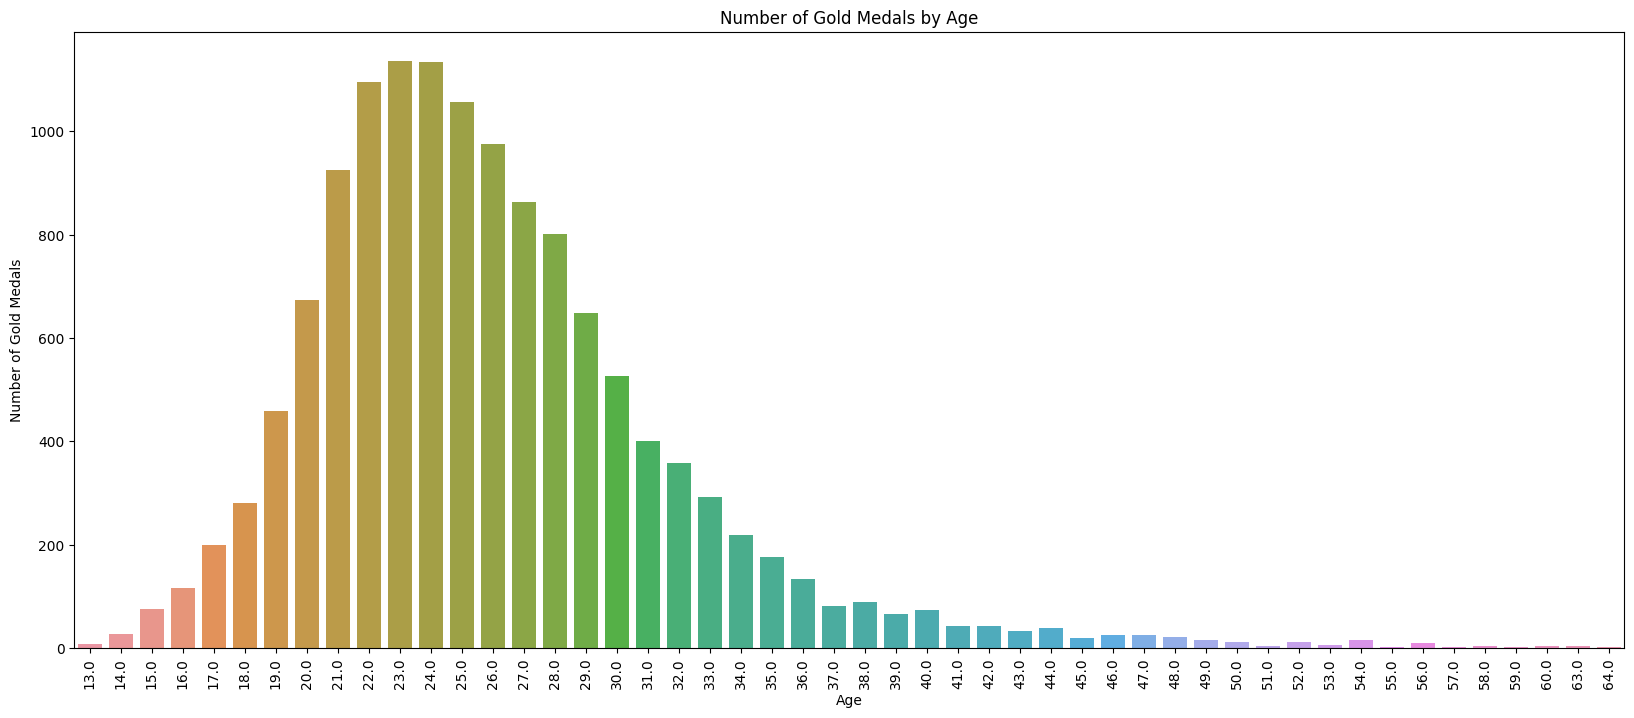

In [10]:
# Plotting the output
plt.figure(figsize=(20, 8))
sns.barplot(x='Age', y='Medals', data=result_sorted)
plt.title('Number of Gold Medals by Age')
plt.xlabel('Age')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Filter the DataFrame for rows with Medal = 'Gold' and Age >= 50
gold_medals_above_50 = athlete_events[(athlete_events['Medal'] == 'Gold') & (athlete_events['Age'] >= 50)]

# Select Sport and Age columns
result = gold_medals_above_50.groupby(['Sport']).size().reset_index(name= 'Count').sort_values(by='Count', ascending=False)

# Display the result
result

,Sport,Count
5,Equestrianism,22
8,Sailing,17
9,Shooting,13
1,Archery,11
2,Art Competitions,8
4,Curling,2
0,Alpinism,1
3,Croquet,1
6,Fencing,1
7,Roque,1


## Gold Medals for Athletes Over 50 based on Sports

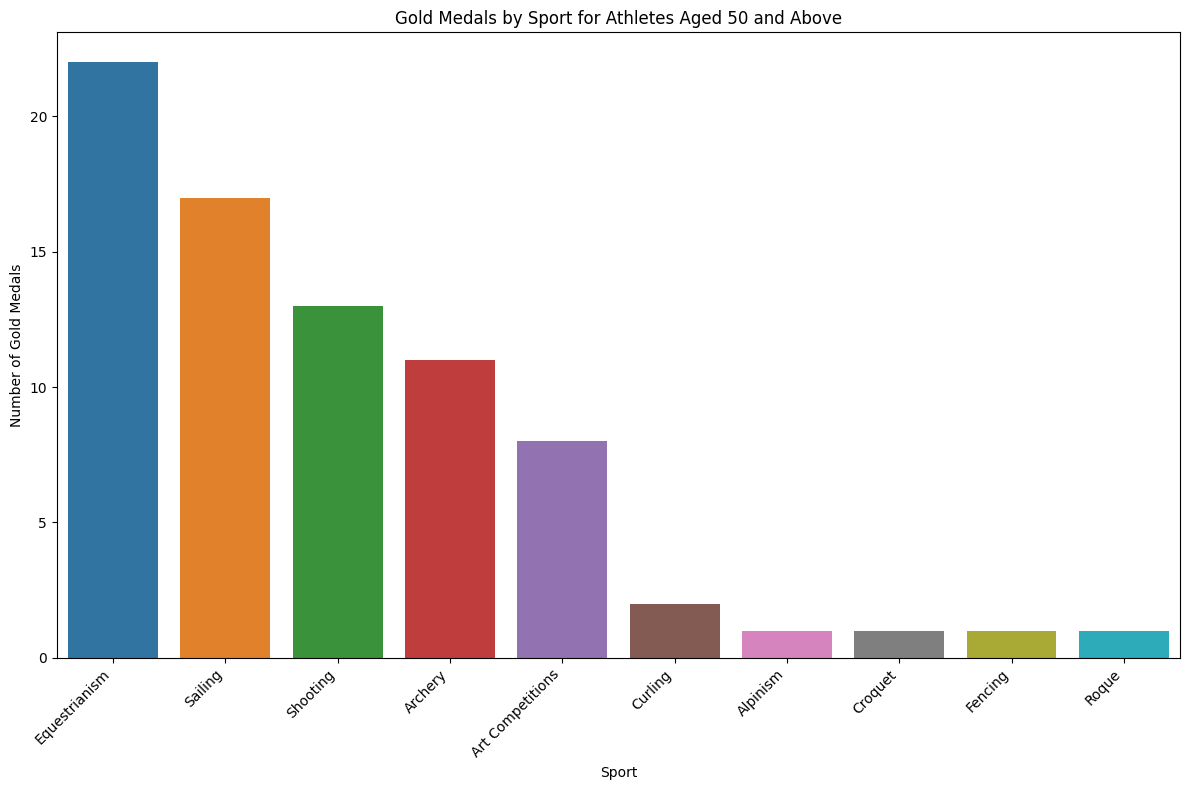

In [12]:
# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Sport', y='Count', data=result)
plt.title('Gold Medals by Sport for Athletes Aged 50 and Above')
plt.xlabel('Sport')
plt.ylabel('Number of Gold Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Women medals per edition(Summer Season) of the Games

In [13]:
female_medals_summer = athlete_events[(athlete_events['Sex'] == 'F') & (athlete_events['Season'] == 'Summer') & (athlete_events['Medal'].isin(['Bronze', 'Gold', 'Silver']))]

# Group by Year and counting the occurrences
result = female_medals_summer.groupby('Year').size().reset_index(name='Medals')

# Sorting the result by Year
result_female = result.sort_values(by='Year')
result_female

,Year,Medals
0,1900.0,13
1,1904.0,10
2,1906.0,6
3,1908.0,16
4,1912.0,30
5,1920.0,44
6,1924.0,46
7,1928.0,97
8,1932.0,62
9,1936.0,88


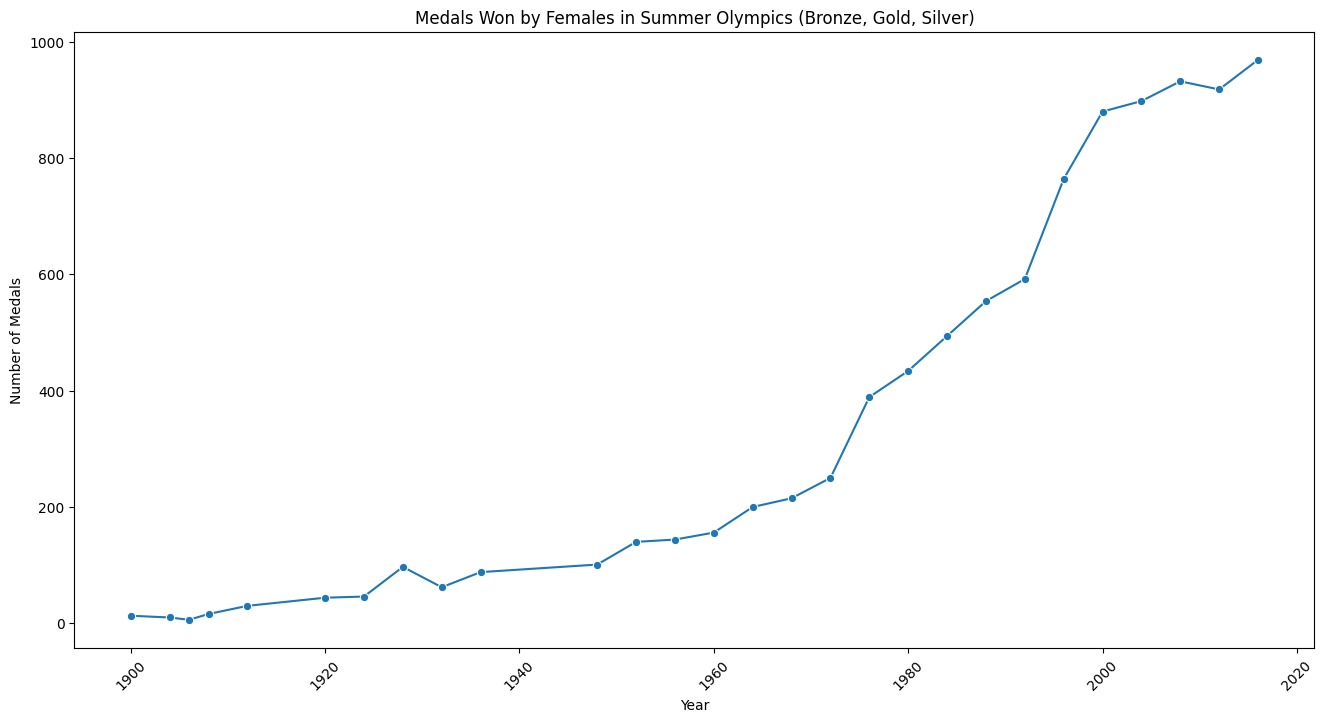

In [14]:
# Create a line plot using seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(data=result_female, x='Year', y='Medals', marker= 'o')
plt.title('Medals Won by Females in Summer Olympics (Bronze, Gold, Silver)')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

# Top 5 Gold Medal Countries

In [15]:
# Merge DataFrames on 'NOC' column
merged_data = athlete_events.merge(noc_regions, on='NOC', how='inner')

# Filter the merged DataFrame for rows with Medal = 'Gold'
gold_medals = merged_data[merged_data['Medal'] == 'Gold']

# Group by 'region' and count the occurrences
result = gold_medals.groupby('region').size().reset_index(name='Medals')

# Sort the result by 'Medals' in descending order
gold_medal_by_countries = result.sort_values(by='Medals', ascending=False).head(5)
gold_medal_by_countries

,region,Medals
90,USA,2638
72,Russia,1599
32,Germany,1301
89,UK,678
43,Italy,575


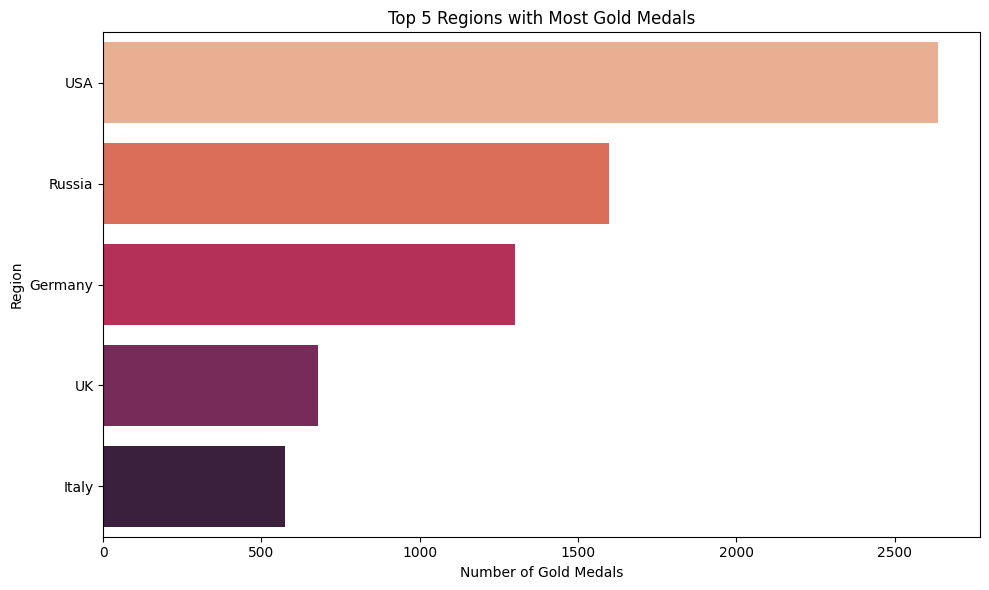

In [16]:
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Medals', y='region', data=gold_medal_by_countries, palette="rocket_r")
plt.title('Top 5 Regions with Most Gold Medals')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

## Top 10 Disciplines with the greatest number of Gold Medals for USA

In [17]:
# Filter the merged DataFrame for rows with Medal = 'Gold' and NOC = 'USA'
usa_gold_medals = merged_data[(merged_data['Medal'] == 'Gold') & (merged_data['NOC'] == 'USA')]

# Group by 'Event' and count the occurrences
result = usa_gold_medals.groupby('Event').size().reset_index(name='Medals')

# Sort the result by 'Medals' in descending order
gold_medals_in_usa = result.sort_values(by='Medals', ascending=False).head(10)

gold_medals_in_usa

,Event,Medals
75,Basketball Men's Basketball,186
254,Swimming Men's 4 x 200 metres Freestyle Relay,111
253,Swimming Men's 4 x 100 metres Medley Relay,108
167,Rowing Men's Coxed Eights,108
76,Basketball Women's Basketball,95
34,Athletics Men's 4 x 400 metres Relay,81
272,Swimming Women's 4 x 100 metres Medley Relay,79
271,Swimming Women's 4 x 100 metres Freestyle Relay,78
130,Football Women's Football,66
33,Athletics Men's 4 x 100 metres Relay,63


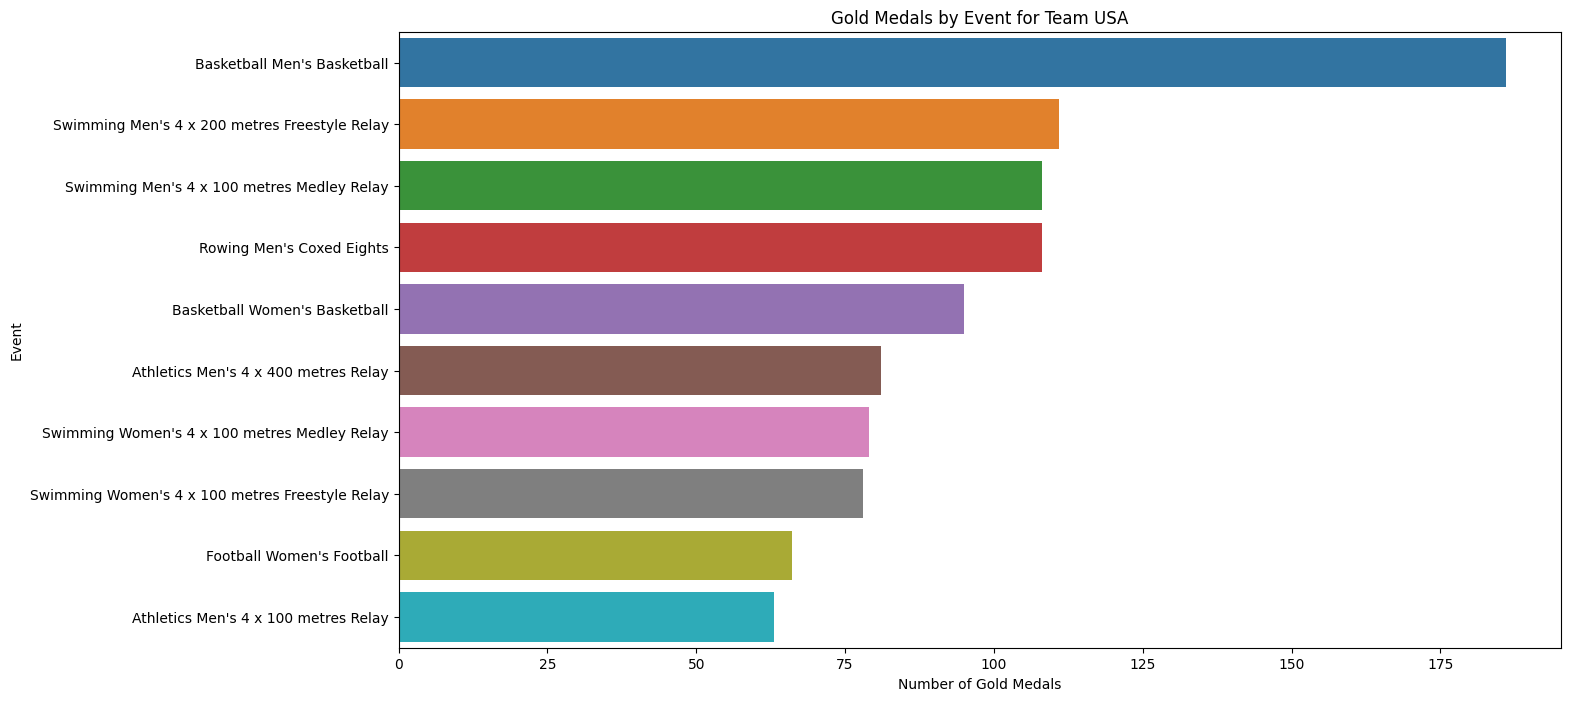

In [18]:
# Create a bar plot using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Medals', y='Event', data=gold_medals_in_usa)
plt.title('Gold Medals by Event for Team USA')
plt.xlabel('Number of Gold Medals')
plt.ylabel('Event')
plt.show()


## Height vs Weight of Olympic Gold Medalists

In [19]:
# Filter the DataFrame for rows with Medal = 'Gold'
gold_medals = athlete_events[athlete_events['Medal'] == 'Gold']

# Select Weight and Height columns
height_weight = gold_medals[['Weight', 'Height']].dropna()

height_weight

,Weight,Height
42,64.0,175.0
44,64.0,175.0
48,64.0,175.0
60,85.0,176.0
73,85.0,176.0
...,...,...
270981,90.0,182.0
271009,60.0,167.0
271016,93.0,200.0
271049,93.0,197.0


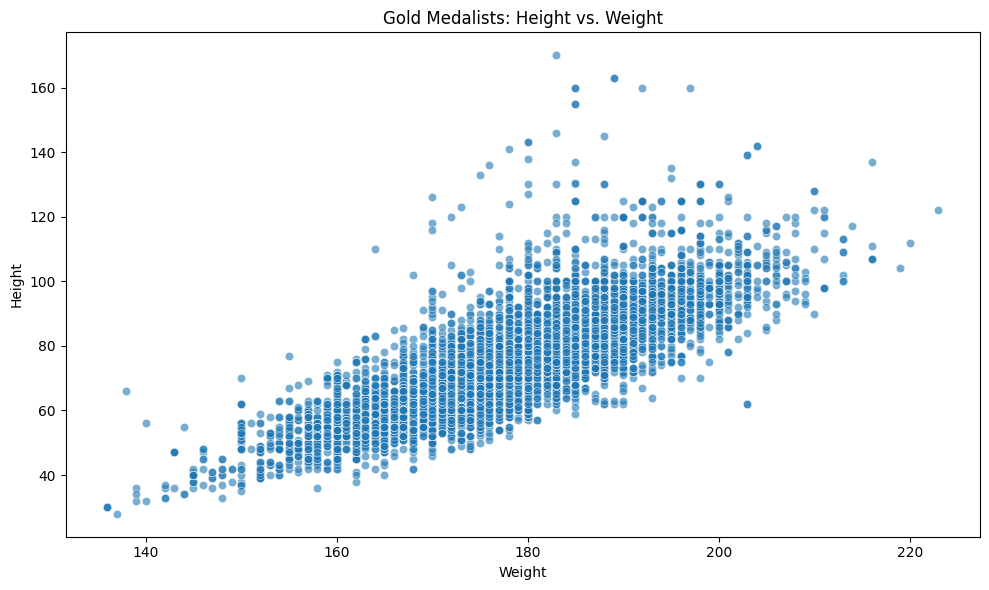

In [20]:
# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=height_weight, alpha=.6)
plt.title('Gold Medalists: Height vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Variation of Male Athletes over time in summer olympics

In [21]:
# Filter the DataFrame for rows with Sex = 'M' and Season = 'Summer'
male_participants_summer = athlete_events[(athlete_events['Sex'] == 'M') & (athlete_events['Season'] == 'Summer')]

# Group by Year and count the occurrences
result = male_participants_summer.groupby('Year').size().reset_index(name='Males')

# Sort the result by Year in ascending order
variation_of_male_atheletes = result.sort_values(by='Year')
variation_of_male_atheletes

,Year,Males
0,1896.0,380
1,1900.0,1903
2,1904.0,1285
3,1906.0,1722
4,1908.0,3054
5,1912.0,3953
6,1920.0,4158
7,1924.0,4989
8,1928.0,4588
9,1932.0,2622


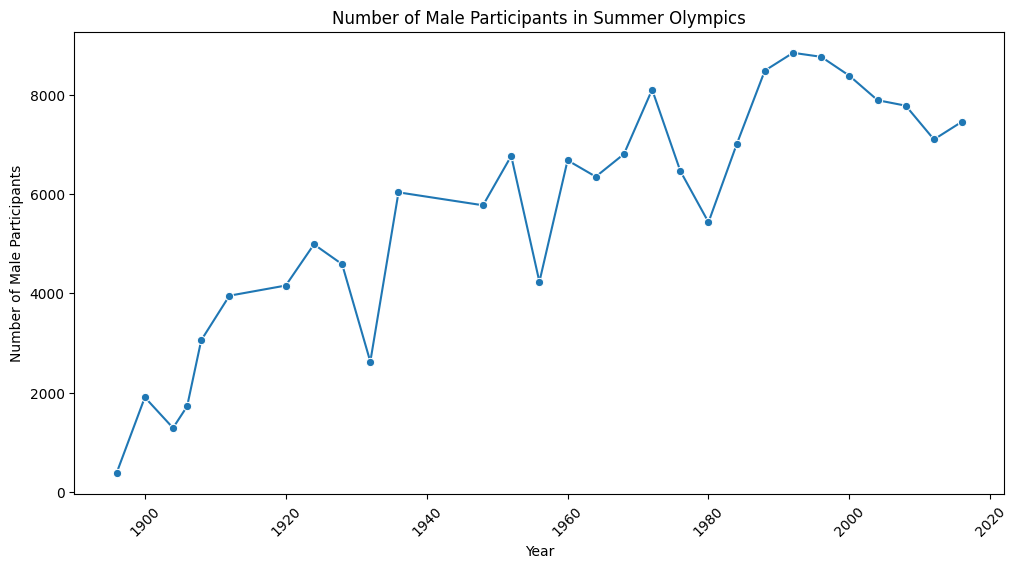

In [22]:
# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=variation_of_male_atheletes, x='Year', y='Males', marker='o')
plt.title('Number of Male Participants in Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Male Participants')
plt.xticks(rotation=45)
plt.show()

## Variation of Female atheletes over time in summer olympics

In [23]:
# Filter the DataFrame for rows with Sex = 'M' and Season = 'Summer'
female_participants_summer = athlete_events[(athlete_events['Sex'] == 'F') & (athlete_events['Season'] == 'Summer')]

# Group by Year and count the occurrences
result = female_participants_summer.groupby('Year').size().reset_index(name='Females')

# Sort the result by Year in ascending order
variation_of_female_atheletes = result.sort_values(by='Year')
variation_of_female_atheletes

,Year,Females
0,1900.0,33
1,1904.0,16
2,1906.0,11
3,1908.0,47
4,1912.0,87
5,1920.0,134
6,1924.0,244
7,1928.0,404
8,1932.0,347
9,1936.0,468


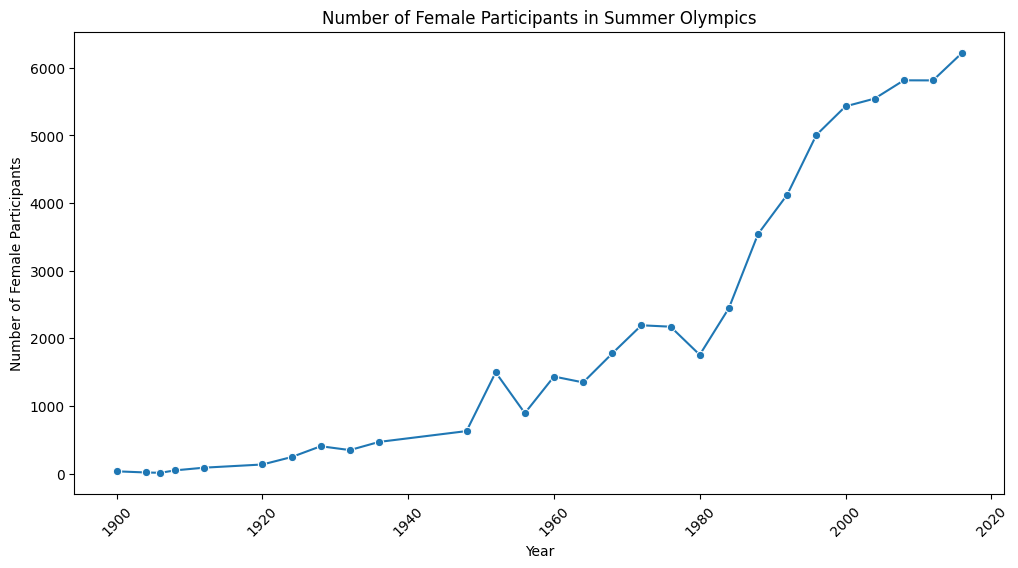

In [24]:
# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=variation_of_female_atheletes, x='Year', y='Females', marker='o')
plt.title('Number of Female Participants in Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Female Participants')
plt.xticks(rotation=45)
plt.show()

# Variation of Age for male atheletes over time

In [25]:
male_data = athlete_events[athlete_events['Sex'] == 'M']

# Group by 'Year' and calculate minimum, mean, and maximum Age
result = male_data.groupby('Year')['Age'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
MaleAge= result.sort_values(by='Year', ascending=True)
MaleAge

,Year,min,mean,max
0,1896.0,10.0,23.580645,40.0
1,1900.0,15.0,29.017825,71.0
2,1904.0,14.0,26.396450,71.0
3,1906.0,13.0,27.139959,54.0
4,1908.0,14.0,26.858268,61.0
5,1912.0,15.0,27.656834,67.0
6,1920.0,13.0,29.470075,72.0
7,1924.0,14.0,28.468815,81.0
8,1928.0,13.0,29.582273,97.0
9,1932.0,13.0,33.008666,96.0


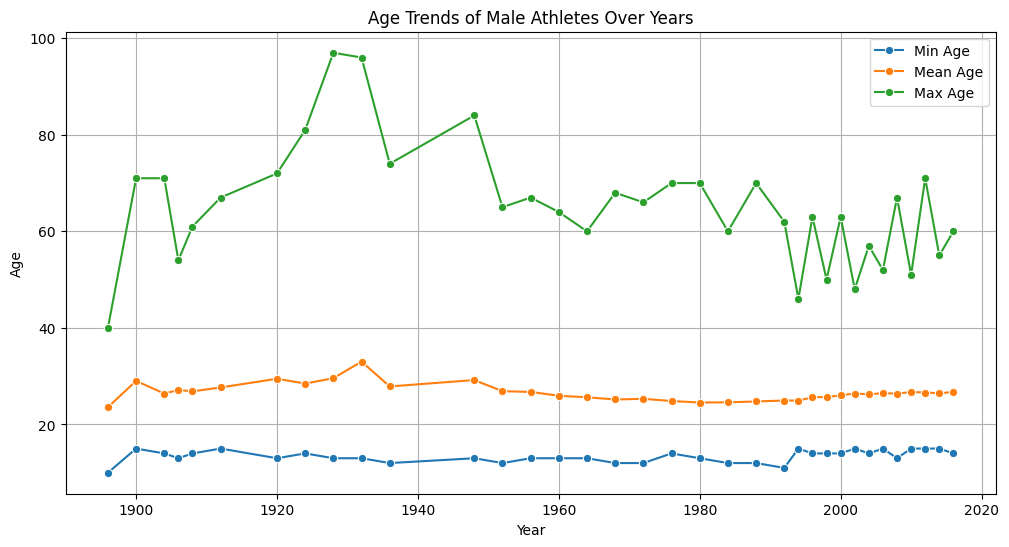

In [26]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum age
sns.lineplot(x='Year', y='min', data=MaleAge, label='Min Age', marker='o')

# Plot mean age
sns.lineplot(x='Year', y='mean', data=MaleAge, label='Mean Age', marker='o')

# Plot maximum age
sns.lineplot(x='Year', y='max', data=MaleAge, label='Max Age', marker='o')

plt.title('Age Trends of Male Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

# Variation of Age for female atheletes over time

In [27]:
female_data = athlete_events[athlete_events['Sex'] == 'F']

# Group by 'Year' and calculate minimum, mean, and maximum Age
result = female_data.groupby('Year')['Age'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
FemaleAge= result.sort_values(by='Year', ascending=True)
FemaleAge

,Year,min,mean,max
0,1900.0,13.0,29.791667,46.0
1,1904.0,24.0,50.230769,63.0
2,1906.0,21.0,23.500000,26.0
3,1908.0,21.0,33.897436,54.0
4,1912.0,13.0,22.379310,45.0
5,1920.0,13.0,24.409836,42.0
6,1924.0,11.0,26.359223,74.0
7,1928.0,11.0,23.712737,67.0
8,1932.0,11.0,29.222552,69.0
9,1936.0,11.0,23.184061,73.0


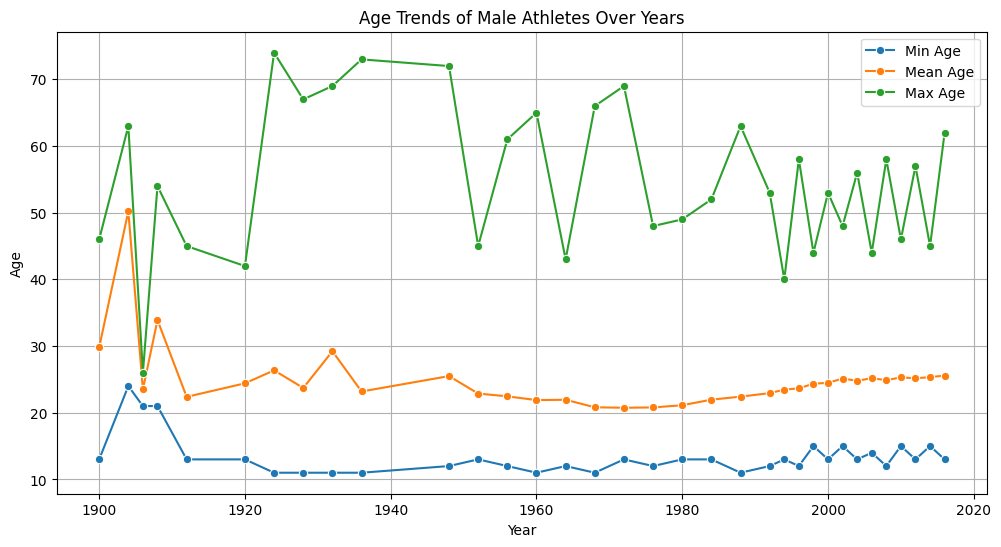

In [28]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum age
sns.lineplot(x='Year', y='min', data=FemaleAge, label='Min Age', marker='o')

# Plot mean age
sns.lineplot(x='Year', y='mean', data=FemaleAge, label='Mean Age', marker='o')

# Plot maximum age
sns.lineplot(x='Year', y='max', data=FemaleAge, label='Max Age', marker='o')

plt.title('Age Trends of Male Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

# Variation of Weight for Male Athletes over time

In [29]:
# Filter the DataFrame for rows where Sex is 'M'
male_data = athlete_events[athlete_events['Sex'] == 'M']

# Group by 'Year' and calculate minimum, mean, and maximum Weight
result = male_data.groupby('Year')['Weight'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
maleWeight = result.sort_values(by='Year', ascending=True)
maleWeight

,Year,min,mean,max
0,1896.0,45.0,71.387755,106.0
1,1900.0,51.0,74.556962,102.0
2,1904.0,43.0,72.197279,115.0
3,1906.0,52.0,75.917073,114.0
4,1908.0,51.0,75.386128,115.0
5,1912.0,49.0,73.117450,125.0
6,1920.0,48.0,73.138298,146.0
7,1924.0,44.0,71.816984,146.0
8,1928.0,41.0,72.000000,125.0
9,1932.0,41.0,71.905680,110.0


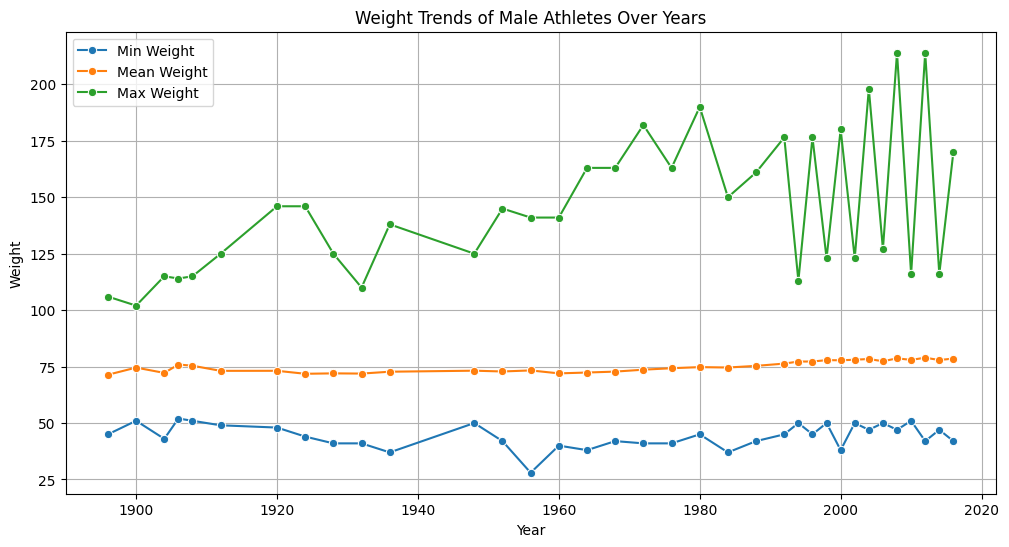

In [30]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum weight
sns.lineplot(x='Year', y='min', data=maleWeight, label='Min Weight', marker='o')

# Plot mean weight
sns.lineplot(x='Year', y='mean', data=maleWeight, label='Mean Weight', marker='o')

# Plot maximum weight
sns.lineplot(x='Year', y='max', data=maleWeight, label='Max Weight', marker='o')

plt.title('Weight Trends of Male Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

# Variation of Weight for Female Athletes over time

In [31]:
# Filter the DataFrame for rows where Sex is 'F' and Year is greater than 1925
female_data = athlete_events[(athlete_events['Sex'] == 'F') & (athlete_events['Year'] > 1925)]

# Group by 'Year' and calculate minimum, mean, and maximum Weight
result = female_data.groupby('Year')['Weight'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
Femaleweight = result.sort_values(by='Year', ascending=True)

Femaleweight

,Year,min,mean,max
0,1928.0,45.0,59.017857,82.0
1,1932.0,43.0,58.771930,74.0
2,1936.0,43.0,58.988636,82.0
3,1948.0,47.0,59.981752,78.0
4,1952.0,46.0,58.148681,116.0
5,1956.0,36.0,58.457306,116.0
6,1960.0,36.0,57.515831,114.0
7,1964.0,38.0,58.161290,114.0
8,1968.0,34.0,57.654219,100.0
9,1972.0,38.0,56.818983,105.0


# Variation of Height for Male Athletes over time

In [32]:
# Filter the DataFrame for rows where Sex is 'M'
male_data = athlete_events[athlete_events['Sex'] == 'M']

# Group by 'Year' and calculate minimum, mean, and maximum Height
result = male_data.groupby('Year')['Height'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
male_height_over_time= result.sort_values(by='Year', ascending=True)

male_height_over_time

,Year,min,mean,max
0,1896.0,154.0,172.739130,188.0
1,1900.0,153.0,176.637931,191.0
2,1904.0,155.0,175.788732,195.0
3,1906.0,165.0,178.206226,196.0
4,1908.0,157.0,177.543158,201.0
5,1912.0,157.0,177.447989,200.0
6,1920.0,148.0,176.144772,197.0
7,1924.0,152.0,175.418085,200.0
8,1928.0,147.0,175.840223,211.0
9,1932.0,147.0,174.931942,200.0


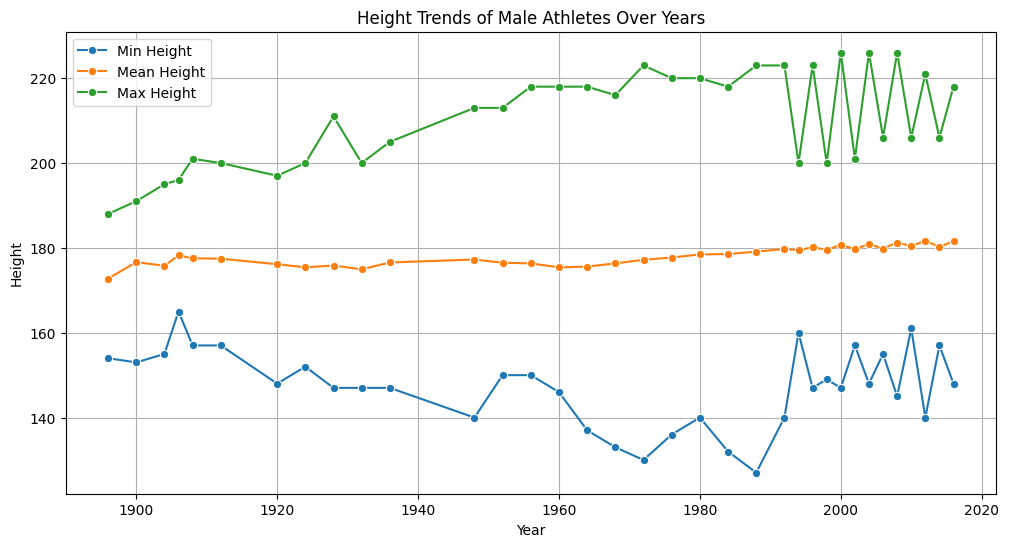

In [33]:

# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum height
sns.lineplot(x='Year', y='min', data=male_height_over_time, label='Min Height', marker='o')

# Plot mean height
sns.lineplot(x='Year', y='mean', data=male_height_over_time, label='Mean Height', marker='o')

# Plot maximum height
sns.lineplot(x='Year', y='max', data=male_height_over_time, label='Max Height', marker='o')

plt.title('Height Trends of Male Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()

# Variation of Height for Female Athletes over time

In [34]:
# Filter the DataFrame for rows where Sex is 'F'
female_data = athlete_events[athlete_events['Sex'] == 'F']

# Group by 'Year' and calculate minimum, mean, and maximum Height
result = female_data.groupby('Year')['Height'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
female_height_over_time= result.sort_values(by='Year', ascending=True)

female_height_over_time

,Year,min,mean,max
0,1900.0,NaN,NaN,NaN
1,1904.0,NaN,NaN,NaN
2,1906.0,NaN,NaN,NaN
3,1908.0,NaN,NaN,NaN
4,1912.0,NaN,NaN,NaN
5,1920.0,142.0,161.809524,175.0
6,1924.0,142.0,162.382353,175.0
7,1928.0,152.0,167.575000,183.0
8,1932.0,152.0,167.153153,183.0
9,1936.0,150.0,167.205607,183.0


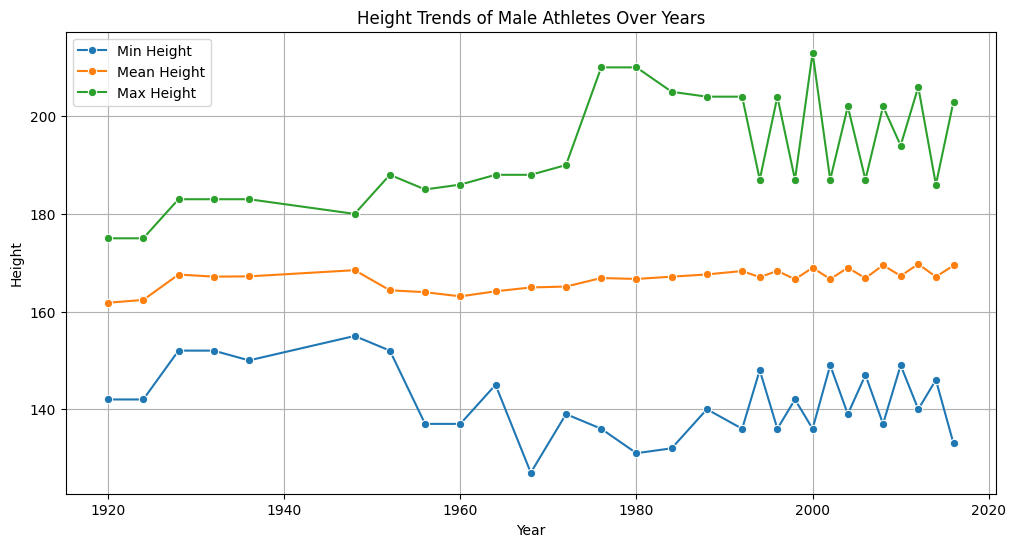

In [35]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum height
sns.lineplot(x='Year', y='min', data=female_height_over_time, label='Min Height', marker='o')

# Plot mean height
sns.lineplot(x='Year', y='mean', data=female_height_over_time, label='Mean Height', marker='o')

# Plot maximum height
sns.lineplot(x='Year', y='max', data=female_height_over_time, label='Max Height', marker='o')

plt.title('Height Trends of Male Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()

# Weight over year for Male Gymnasts

In [36]:
# Filter the DataFrame for rows where Sport is 'Gymnastics', Sex is 'M', and Year is greater than 1950
filtered_data = athlete_events[(athlete_events['Sport'] == 'Gymnastics') & (athlete_events['Sex'] == 'M') & (athlete_events['Year'] > 1950)]

# Group by 'Year' and calculate minimum, mean, and maximum Weight
result = filtered_data.groupby('Year')['Weight'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
male_gymnasts = result.sort_values(by='Year', ascending=True)

male_gymnasts



,Year,min,mean,max
0,1952.0,54.0,64.920152,80.0
1,1956.0,53.0,66.200957,77.0
2,1960.0,52.0,65.194508,80.0
3,1964.0,49.0,64.110995,78.0
4,1968.0,50.0,63.805281,85.0
5,1972.0,53.0,63.691159,78.0
6,1976.0,51.0,62.664748,85.0
7,1980.0,53.0,62.687008,78.0
8,1984.0,51.0,62.330309,72.0
9,1988.0,52.0,62.677698,74.0


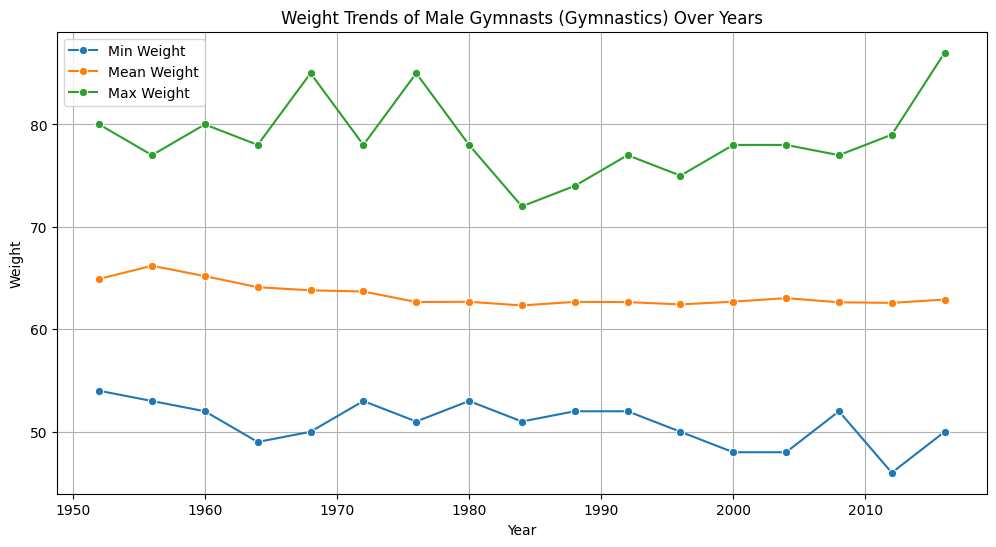

In [37]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum weight
sns.lineplot(x='Year', y='min', data=male_gymnasts, label='Min Weight', marker='o')

# Plot mean weight
sns.lineplot(x='Year', y='mean', data=male_gymnasts, label='Mean Weight', marker='o')

# Plot maximum weight
sns.lineplot(x='Year', y='max', data=male_gymnasts, label='Max Weight', marker='o')

plt.title('Weight Trends of Male Gymnasts (Gymnastics) Over Years')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

# Weight over year for Female Gymnasts

In [38]:
# Filter the DataFrame for rows where Sport is 'Gymnastics', Sex is 'F', and Year is greater than 1950
filtered_data = athlete_events[(athlete_events['Sport'] == 'Gymnastics') & (athlete_events['Sex'] == 'F') & (athlete_events['Year'] > 1950)]

# Group by 'Year' and calculate minimum, mean, and maximum Weight
result = filtered_data.groupby('Year')['Weight'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
female_gymnasts = result.sort_values(by='Year', ascending=True)

female_gymnasts

,Year,min,mean,max
0,1952.0,48.0,54.635135,63.0
1,1956.0,48.0,54.795556,61.0
2,1960.0,41.0,53.795588,66.0
3,1964.0,38.0,53.352321,67.0
4,1968.0,40.0,51.761499,62.0
5,1972.0,39.0,49.934815,66.0
6,1976.0,30.0,47.330677,60.0
7,1980.0,25.0,41.421788,61.0
8,1984.0,31.0,44.055409,56.0
9,1988.0,33.0,43.440613,55.0


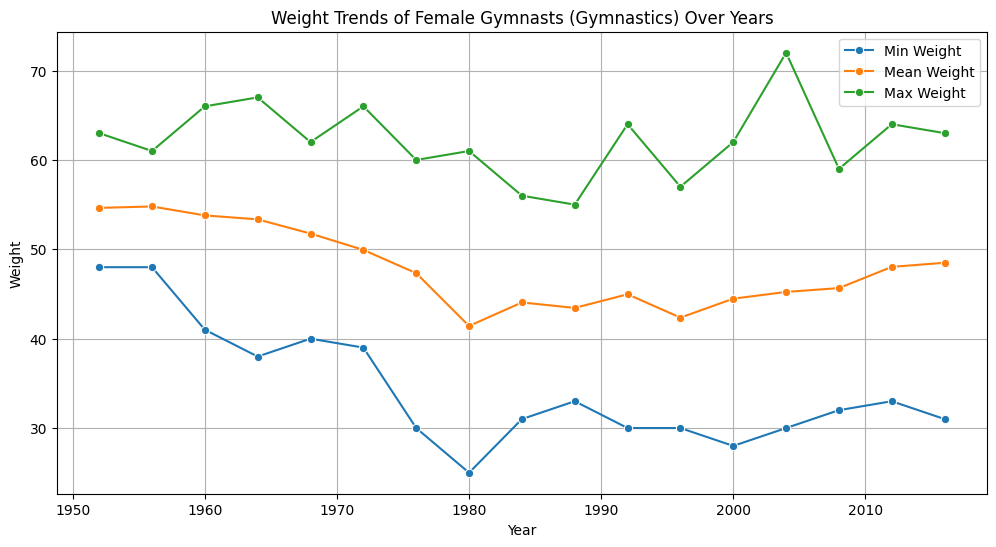

In [39]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum weight
sns.lineplot(x='Year', y='min', data=female_gymnasts, label='Min Weight', marker='o')

# Plot mean weight
sns.lineplot(x='Year', y='mean', data=female_gymnasts, label='Mean Weight', marker='o')

# Plot maximum weight
sns.lineplot(x='Year', y='max', data=female_gymnasts, label='Max Weight', marker='o')

plt.title('Weight Trends of Female Gymnasts (Gymnastics) Over Years')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

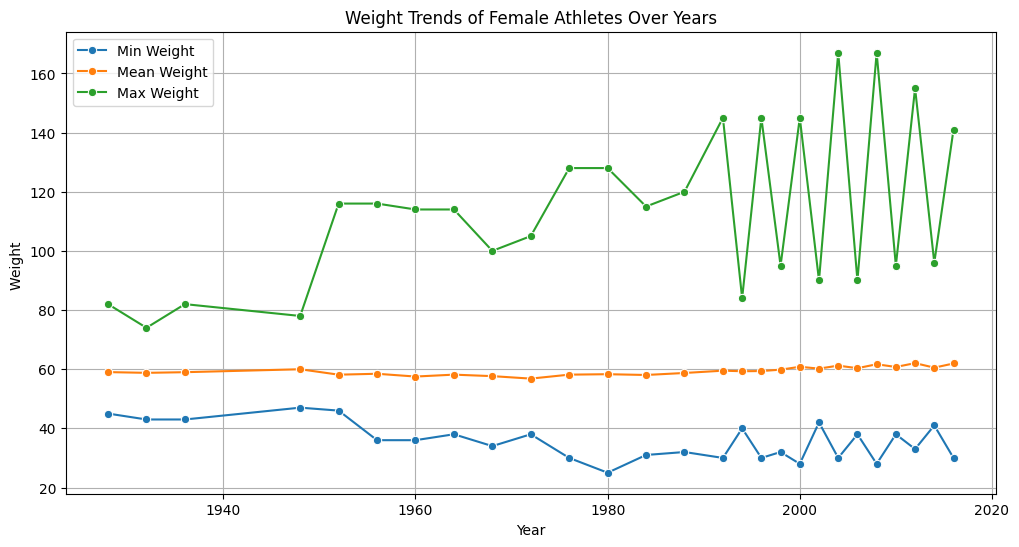

In [40]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum weight
sns.lineplot(x='Year', y='min', data=Femaleweight, label='Min Weight', marker='o')

# Plot mean weight
sns.lineplot(x='Year', y='mean', data=Femaleweight, label='Mean Weight', marker='o')

# Plot maximum weight
sns.lineplot(x='Year', y='max', data=Femaleweight, label='Max Weight', marker='o')

plt.title('Weight Trends of Female Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Weight ')
plt.legend()
plt.grid(True)
plt.show()

# Weight over years for Male Lifters

In [41]:
# Filter the DataFrame for rows where Sport is 'Weightlifting', Sex is 'M', and Year is greater than 1950
filtered_data = athlete_events[(athlete_events['Sport'] == 'Weightlifting') & (athlete_events['Sex'] == 'M') & (athlete_events['Year'] > 1950)]

# Group by 'Year' and calculate minimum, mean, and maximum Weight
result = filtered_data.groupby('Year')['Weight'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
male_lifters = result.sort_values(by='Year', ascending=True)
male_lifters

,Year,min,mean,max
0,1952.0,55.0,75.679577,139.0
1,1956.0,55.0,73.833333,141.0
2,1960.0,55.0,75.668605,136.0
3,1964.0,52.0,77.708054,163.0
4,1968.0,51.0,78.440625,163.0
5,1972.0,51.0,79.930851,161.0
6,1976.0,51.0,77.607900,161.0
7,1980.0,51.0,79.313953,160.0
8,1984.0,51.0,78.572581,148.0
9,1988.0,50.0,80.779499,161.0


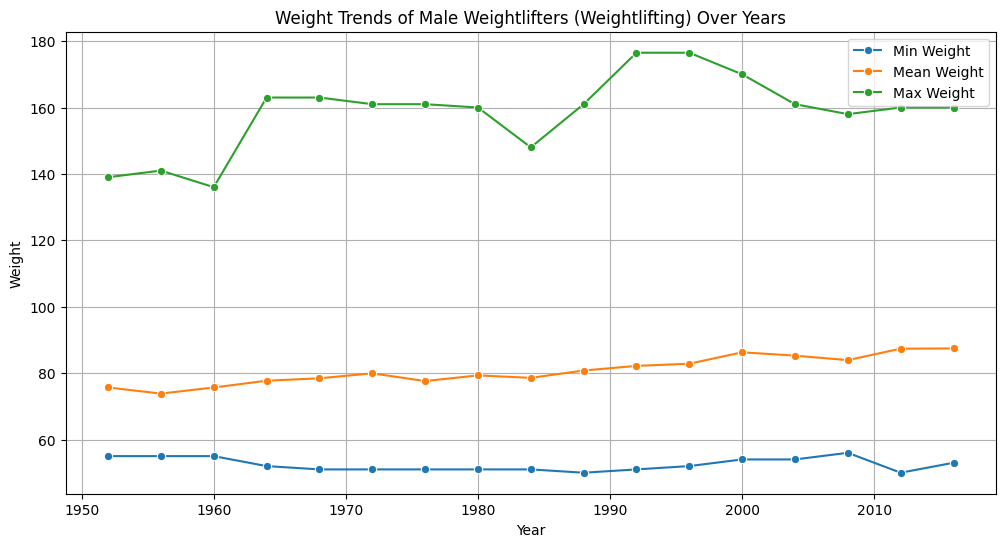

In [42]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum weight
sns.lineplot(x='Year', y='min', data=male_lifters, label='Min Weight', marker='o')

# Plot mean weight
sns.lineplot(x='Year', y='mean', data=male_lifters, label='Mean Weight', marker='o')

# Plot maximum weight
sns.lineplot(x='Year', y='max', data=male_lifters, label='Max Weight', marker='o')

plt.title('Weight Trends of Male Weightlifters (Weightlifting) Over Years')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

# Weight over years for Female Lifters

In [43]:
# Filter the DataFrame for rows where Sport is 'Weightlifting', Sex is 'F', and Year is greater than 1950
filtered_data = athlete_events[(athlete_events['Sport'] == 'Weightlifting') & (athlete_events['Sex'] == 'F') & (athlete_events['Year'] > 1950)]

# Group by 'Year' and calculate minimum, mean, and maximum Weight
result = filtered_data.groupby('Year')['Weight'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
female_lifters = result.sort_values(by='Year', ascending=True)
female_lifters

,Year,min,mean,max
0,2000.0,48.0,66.347059,136.0
1,2004.0,47.0,69.223529,167.0
2,2008.0,47.0,67.873563,167.0
3,2012.0,48.0,66.592233,155.0
4,2016.0,47.0,68.631068,141.0


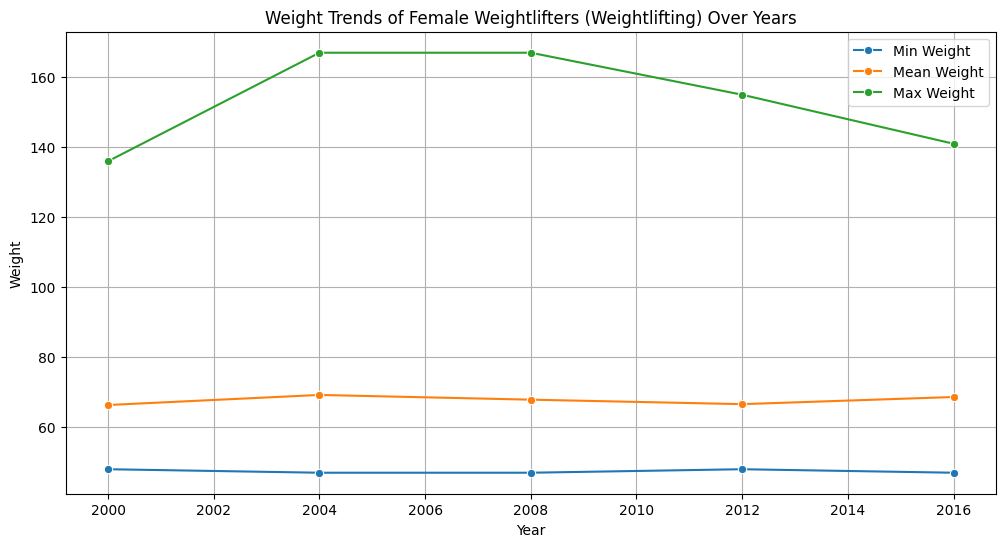

In [44]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum weight
sns.lineplot(x='Year', y='min', data=female_lifters, label='Min Weight', marker='o')

# Plot mean weight
sns.lineplot(x='Year', y='mean', data=female_lifters, label='Mean Weight', marker='o')

# Plot maximum weight
sns.lineplot(x='Year', y='max', data=female_lifters, label='Max Weight', marker='o')

plt.title('Weight Trends of Female Weightlifters (Weightlifting) Over Years')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

## Variation of Height for males over time in weightlifitng

In [45]:
filtered_data = athlete_events[(athlete_events['Sport'] == 'Weightlifting') & (athlete_events['Sex'] == 'M') & (athlete_events['Year'] > 1950)]

# Group by 'Year' and calculate minimum, mean, and maximum Weight
result = filtered_data.groupby('Year')['Weight'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
maleheight = result.sort_values(by='Year', ascending=True)

maleheight

,Year,min,mean,max
0,1952.0,55.0,75.679577,139.0
1,1956.0,55.0,73.833333,141.0
2,1960.0,55.0,75.668605,136.0
3,1964.0,52.0,77.708054,163.0
4,1968.0,51.0,78.440625,163.0
5,1972.0,51.0,79.930851,161.0
6,1976.0,51.0,77.607900,161.0
7,1980.0,51.0,79.313953,160.0
8,1984.0,51.0,78.572581,148.0
9,1988.0,50.0,80.779499,161.0


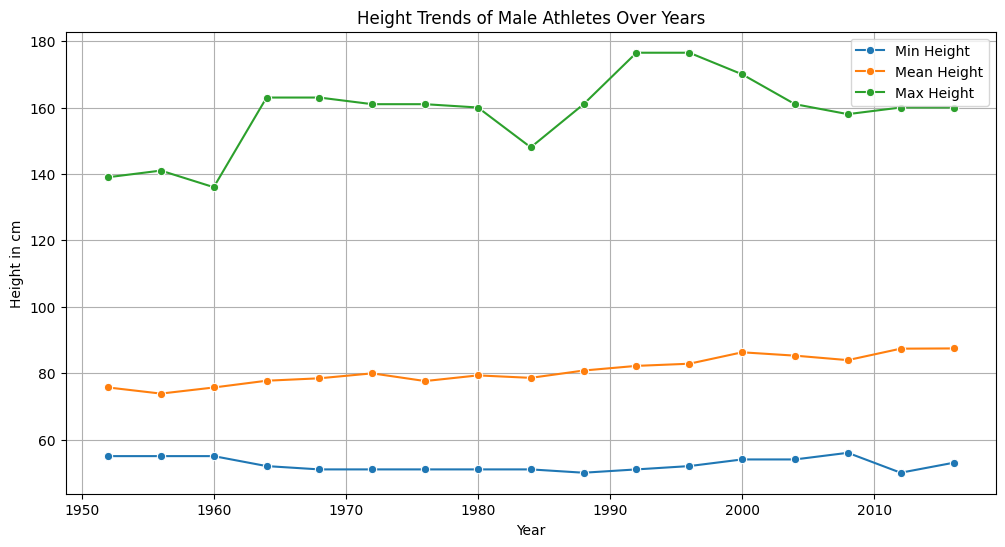

In [46]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum weight
sns.lineplot(x='Year', y='min', data=maleheight, label='Min Height', marker='o')

# Plot mean weight
sns.lineplot(x='Year', y='mean', data=maleheight, label='Mean Height', marker='o')

# Plot maximum weight
sns.lineplot(x='Year', y='max', data=maleheight, label='Max Height', marker='o')

plt.title('Height Trends of Male Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Height in cm')
plt.legend()
plt.grid(True)
plt.show()

## Variation of Height for females over time in weightlifiting

In [47]:
# Filter the DataFrame for rows where Sport is 'Weightlifting', Sex is 'F', and Year is greater than 1950
filtered_data = athlete_events[(athlete_events['Sport'] == 'Weightlifting') & (athlete_events['Sex'] == 'F') & (athlete_events['Year'] > 1950)]

# Group by 'Year' and calculate minimum, mean, and maximum Height
result = filtered_data.groupby('Year')['Height'].agg(['min', 'mean', 'max']).reset_index()

# Sort the result by 'Year' in ascending order
femaleheight = result.sort_values(by='Year', ascending=True)

femaleheight

,Year,min,mean,max
0,2000.0,145.0,160.717647,180.0
1,2004.0,145.0,160.797619,181.0
2,2008.0,141.0,160.206897,181.0
3,2012.0,142.0,160.059406,190.0
4,2016.0,145.0,160.611650,178.0


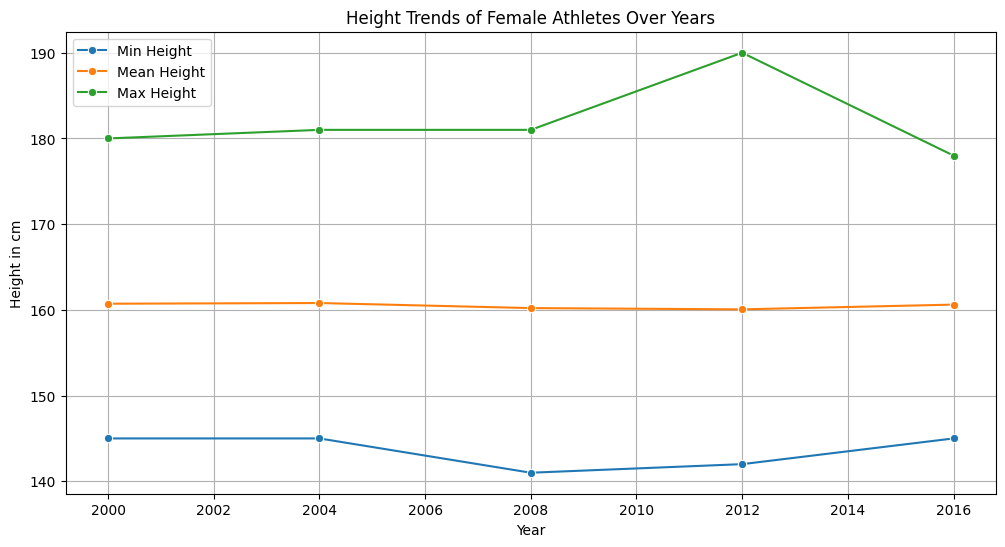

In [48]:
# Create line plots using seaborn
plt.figure(figsize=(12, 6))

# Plot minimum weight
sns.lineplot(x='Year', y='min', data=femaleheight, label='Min Height', marker='o')

# Plot mean weight
sns.lineplot(x='Year', y='mean', data=femaleheight, label='Mean Height', marker='o')

# Plot maximum weight
sns.lineplot(x='Year', y='max', data=femaleheight, label='Max Height', marker='o')

plt.title('Height Trends of Female Athletes Over Years')
plt.xlabel('Year')
plt.ylabel('Height in cm')
plt.legend()
plt.grid(True)
plt.show()

# Gold medal by countries

In [49]:
# Filter the merged DataFrame for rows with Medal = 'Gold'
gold_medals = merged_data[merged_data['Medal'] == 'Gold']

# Group by 'NOC' and count the occurrences
result_noc = gold_medals.groupby('NOC').size().reset_index(name='Medals')

# Sort the result by 'Medals' in descending order
result_noc_sorted = result_noc.sort_values(by='Medals', ascending=False)

result_noc_sorted


,NOC,Medals
102,USA,2638
100,URS,1082
39,GER,745
36,GBR,678
51,ITA,575
...,...,...
20,CRC,1
73,PAN,1
74,PER,1
78,PUR,1


In [50]:
# Merge DataFrames on 'NOC' column
merged_data = athlete_events.merge(noc_regions, on='NOC', how='inner')

# Filter the merged DataFrame for rows with Medal = 'Gold'
gold_medals = merged_data[merged_data['Medal'] == 'Gold']

# Create a dictionary to map NOCs to their respective ISO country codes
noc_to_country = {
    'ALG': 'DZA', 'ANZ': 'AUS', 'BAH': 'BHS', 'BUL': 'BGR', 'CRC': 'CRI', 'CRO': 'HRV',
    'DEN': 'DNK', 'EUN': 'RUS', 'FIJ': 'FJI', 'FRG': 'DEU', 'GDR': 'DEU', 'GER': 'DEU',
    'GRN': 'GRD', 'IRI': 'IRN', 'MGL': 'MNG', 'NED': 'NLD', 'NEP': 'NPL', 'NGR': 'NGA',
    'POR': 'PRT', 'PUR': 'PRI', 'RSA': 'ZAF', 'SCG': 'SRB', 'SLO': 'SVN', 'SUI': 'CHE',
    'TCH': 'CZE', 'TPE': 'TWN', 'UAE': 'ARE', 'URS': 'RUS', 'URU': 'URY', 'VIE': 'VNM',
    'YUG': 'SRB', 'ZIM': 'ZWE', 'CHI': 'CHL', 'GRE': 'GRC', 'HAI': 'HTI', 'INA': 'IDN',
    'LAT': 'LVA'
}

gold_medals = merged_data[merged_data['Medal'] == 'Gold'].copy()
gold_medals['COUNTRY'] = gold_medals['NOC'].map(noc_to_country)

# Group by 'COUNTRY' and count the occurrences
result = gold_medals.groupby('COUNTRY').size().reset_index(name='Medals')

# Sort the result by 'Medals' in descending order
gold_medals = result.sort_values(by='Medals', ascending=False)

gold_medals= gold_medals.rename(columns={'COUNTRY': 'NOC'})
gold_medals

,NOC,Medals
8,DEU,1301
25,RUS,1209
21,NLD,287
9,DNK,179
4,CHE,175
26,SRB,142
7,CZE,81
12,GRC,62
14,HRV,58
2,BGR,54


In [51]:
merged= result_noc_sorted.merge(gold_medals, on="NOC", how="outer")

In [52]:
merge= pd.concat([result_noc_sorted,gold_medals])
merge.sort_values(by="Medals", ascending=False)

,NOC,Medals
102,USA,2638
8,DEU,1301
25,RUS,1209
100,URS,1082
39,GER,745
...,...,...
58,KOS,1
47,IOA,1
105,VIE,1
50,ISR,1
